In [1]:
import pandas as pd
import glob

In [11]:
#keep fun
def read_file(filename,cols=['Date','Adj Close']):
    columns = cols
    df= pd.read_csv(filename, index_col="Date",
                    parse_dates=True,usecols=columns,
                    na_values=['nan'])
    return df
def test_run(fp1,fp2):
    #Define date range
    start_date = '2010-01-22'
    end_date = '2010-01-26'
    dates =  pd.date_range(start_date,end_date)
    print("date range:", dates)
    
    #Create empty dataframe with dates index
    df1 = pd.DataFrame(index=dates)
    print(df1)
    
    #Read the csv data
    dfDE = read_file(fp1)
    print(dfDE.head())
    dfCAT = read_file(fp2)
    print(dfCAT.head())

    #Join the two data frames using DataFrame.join()
    df1 = df1.join(dfCAT, how="inner")
#     df1 = df1.dropna()
    print(df1)

In [ ]:
if __name__ == "__main__":
    file_path_1 = "../data/raw/DE.csv"
    file_path_2 = "../data/raw/CAT.csv"
    test_run(file_path_1,file_path_2)


In [ ]:

data_files = sorted(glob.glob("../data/raw/*.csv"))
print("file list",data_files)


In [ ]:
#read all stocks into dataframe
for file in data_files:
    print(file)
    dfTemp = read_file(file)

In [25]:
#read multiple stocks of choice
#keep fun
def test_multi_read(folder_path,start_date,end_date,symbols,log=False,cols=['Date','Adj Close']):
    #Define date range
    print("symbols requested: ", symbols)
    dates =  pd.date_range(start_date,end_date)
    print("date range selected:", dates)
    columns = cols
    #Create empty dataframe with dates index
    df1 = pd.DataFrame(index=dates)
    if log==True:
        print(df1)

    for symbol in symbols:
        filename =  folder_path + '{}'.format(symbol) + '.csv'
        if log==True:
             print(filename)
        df_temp = read_file(filename,columns)
        if log==True:
            print(df_temp.head())
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp, how="inner")
        if log==True:
             print(df1.head())
    return df1

symbols requested:  ['SPY', 'GOOG', 'IBM', 'GLD', 'CAT', 'DE']
date range selected: DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')
                  SPY        GOOG        IBM         GLD        CAT         DE
2010-01-04  91.475693  312.204773  92.163887  109.800003  42.375568  44.185638
2010-01-05  91.717857  310.829926  91.050545  109.699997  42.882214  44.020134
2010-01-06  91.782425  302.994293  90.459076  111.510002  43.012470  43.901901
2010-01-07  92.169884  295.940735  90.145927  110.820000  43.186176  44.217175
2010-01-08  92.476563  299.885956  91.050545  111.370003  43.671082  45

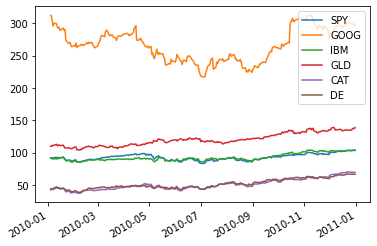

In [45]:
if __name__ == "__main__":
    sym = ['SPY','GOOG','IBM','GLD','CAT','DE']
    fol_path = '../data/raw/'
    strt_date = '2010-01-01'
    fin_date = '2010-12-31'
    cols_selected = ['Date','Adj Close']
    df = test_multi_read(fol_path,strt_date,fin_date,sym,cols=cols_selected)
    print(df.head())
    print(df.loc['2010-02-01':'2010-02-15'])
    print(df[['GOOG']])
    print(df[['GOOG','IBM']])
#     df1 = df.loc['2010-02-01':'2010-02-15',['SPY','GOOG']]
    df.plot()
